In [1]:
import tradingeconomics as te
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.33, random_state=42)


In [2]:
te.login("51a072f89c934bd:l011saq3ckgd3ka")

'You are logged in as a 51a072f89c934bd:l011saq3ckgd3ka'

In [3]:
df=te.getPeers(country='mexico', output_type='df')
df

https://api.tradingeconomics.com/peers/country/mexico?c=51a072f89c934bd:l011saq3ckgd3ka


,Ticker,Peer,Relationship,Country,Category,Title,LatestValueDate,LatestValue,Source,SourceURL,Unit,URL,CategoryGroup,Adjustment,Frequency,HistoricalDataSymbol,CreateDate,FirstValueDate,PreviousValue,PreviousValueDate
0,WGDPMEXI,WGDPMEXI,-1,Mexico,GDP,Mexico GDP,2021-12-31T00:00:00,1293.04,World Bank,https://www.worldbank.org/,USD Billion,/mexico/gdp,GDP,Current USD,Yearly,WGDPMEXI,2014-07-03T15:32:00,1960-12-31T00:00:00,1087.12,2020-12-31T00:00:00
1,WGDPMEXI,MEXNYGDPPCAPPPCD,0,Mexico,GDP per Capita PPP,Mexico GDP per capita PPP,2021-12-31T00:00:00,18544.71,World Bank,https://www.worldbank.org/,USD,/mexico/gdp-per-capita-ppp,GDP,Constant 2017 International Dollars,Yearly,MEXNYGDPPCAPPPCD,2014-09-17T14:56:00,1990-12-31T00:00:00,17878.28,2020-12-31T00:00:00
2,WGDPMEXI,MEXNYGDPPCAPKD,0,Mexico,GDP per Capita,Mexico GDP per capita,2021-12-31T00:00:00,9255.21,World Bank,https://www.worldbank.org/,USD,/mexico/gdp-per-capita,GDP,Constant 2015 USD,Yearly,MEXNYGDPPCAPKD,2014-07-08T15:56:00,1960-12-31T00:00:00,8922.61,2020-12-31T00:00:00
3,WGDPMEXI,MEXICOGFPA,1,Mexico,GDP from Public Administration,Mexico GDP From Public Administration,2022-09-30T00:00:00,694085.03,Instituto Nacional de Estadística y Geografía ...,https://www.inegi.org.mx/,MXN Million,/mexico/gdp-from-public-administration,GDP,"Constant 2013 Prices, NSA",Quarterly,MEXICOGFPA,2015-06-24T17:37:00,1993-03-31T00:00:00,717235.51,2022-06-30T00:00:00
4,WGDPMEXI,MEXICOGDPFROUTI,1,Mexico,GDP from Utilities,Mexico GDP From Utilities,2022-09-30T00:00:00,247685.00,Instituto Nacional de Estadística y Geografía ...,https://www.inegi.org.mx/,MXN Million,/mexico/gdp-from-utilities,GDP,"Constant 2013 Prices, NSA",Quarterly,MEXICOGDPFROUTI,2015-06-24T17:36:00,1993-03-31T00:00:00,282058.00,2022-06-30T00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,MEX.EN.ATM.CO2E.KT,MEXPREC,0,Mexico,Precipitation,Mexico Average Precipitation,2021-12-31T00:00:00,837.45,Worldbank,,mm,/mexico/precipitation,Climate,,Yearly,MEXPREC,2017-10-27T10:09:00,1901-12-31T00:00:00,691.92,2020-12-31T00:00:00
870,MEX SP.POP.TOTL,MEX SP.POP.TOTL,-1,Mexico,Population,Mexico Population,2021-12-31T00:00:00,126.25,Consejo Nacional de Población,https://www.gob.mx,Million,/mexico/population,Labour,,Yearly,MEX SP.POP.TOTL,2014-07-08T11:50:00,1960-12-31T00:00:00,126.01,2020-12-31T00:00:00
871,GMXN10YR,GMXN10YR,-1,Mexico,Government Bond 10Y,Mexico Government Bond 10Y,2022-11-25T00:00:00,9.13,Secretaria de Hacienda y Credito Publico,,percent,/mexico/government-bond-yield,Markets,,Daily,GMXN10YR,2012-11-15T11:38:00,2001-07-31T00:00:00,9.09,2022-11-24T00:00:00
872,2738A38,MEXDEBT2GDP,0,Mexico,Government Debt to GDP,Mexico Government Debt to GDP,2021-12-31T00:00:00,49.60,Secretaria de Hacienda y Credito Publico,https://www.gob.mx,percent of GDP,/mexico/government-debt-to-gdp,Government,,Yearly,MEXDebt2GDP,2014-04-28T16:27:00,1990-12-31T00:00:00,51.30,2020-12-31T00:00:00


In [4]:
df.corr()

,Relationship,LatestValue,PreviousValue
Relationship,1.000000,0.007600,0.007723
LatestValue,0.007600,1.000000,0.999954
PreviousValue,0.007723,0.999954,1.000000


In [5]:
df.dtypes

Ticker                   object
Peer                     object
Relationship              int64
Country                  object
Category                 object
Title                    object
LatestValueDate          object
LatestValue             float64
Source                   object
SourceURL                object
Unit                     object
URL                      object
CategoryGroup            object
Adjustment               object
Frequency                object
HistoricalDataSymbol     object
CreateDate               object
FirstValueDate           object
PreviousValue           float64
PreviousValueDate        object
dtype: object

In [6]:
df.columns

Index(['Ticker', 'Peer', 'Relationship', 'Country', 'Category', 'Title',
       'LatestValueDate', 'LatestValue', 'Source', 'SourceURL', 'Unit', 'URL',
       'CategoryGroup', 'Adjustment', 'Frequency', 'HistoricalDataSymbol',
       'CreateDate', 'FirstValueDate', 'PreviousValue', 'PreviousValueDate'],
      dtype='object')

In [7]:
new_df=df[['LatestValue','PreviousValue','Relationship']]
new_df

,LatestValue,PreviousValue,Relationship
0,1293.04,1087.12,-1
1,18544.71,17878.28,0
2,9255.21,8922.61,0
3,694085.03,717235.51,1
4,247685.00,282058.00,1
...,...,...,...
869,837.45,691.92,0
870,126.25,126.01,-1
871,9.13,9.09,-1
872,49.60,51.30,0


In [37]:
new_df.head(100)

,LatestValue,PreviousValue,Relationship
0,1293.04,1087.12,-1
1,18544.71,17878.28,0
2,9255.21,8922.61,0
3,694085.03,717235.51,1
4,247685.00,282058.00,1
...,...,...,...
95,0.57,0.62,0
96,155.80,159.05,0
97,14.54,14.55,0
98,120.65,120.00,0


In [12]:
a = df['PreviousValue']
b = df['LatestValue']

len(a), len(b)

(874, 874)

<AxesSubplot:title={'center':'L vs P'}, xlabel='PreviousValue', ylabel='LatestValue'>

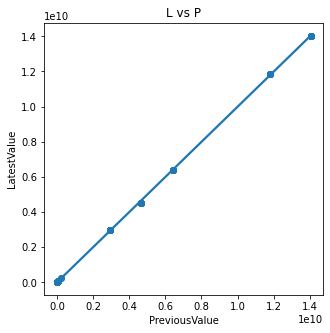

In [21]:
#Figure size
plt.figure(figsize = (5,5))

#Labels
plt.xlabel('TPreviousValue')
plt.ylabel('LatestValue')
plt.title('L vs P')

sns.regplot(x =a_train,y = b_train)

In [22]:
a.shape, b.shape

((874,), (874,))

In [23]:
a_reshape = a.values.reshape(-1,1)
b_reshape = b.values.reshape(-1,1)

a_reshape.shape, b_reshape.shape

((874, 1), (874, 1))

In [24]:
a_train, a_test, b_train, b_test = train_test_split(a_reshape, b_reshape, test_size=0.2, random_state=5)

a_train.shape, a_test.shape, b_train.shape, b_test.shape

((699, 1), (175, 1), (699, 1), (175, 1))

In [25]:
linreg = LinearRegression()
linreg.fit(a_train,b_train)

LinearRegression()

In [26]:
b_pred = linreg.predict(a_test)
b_pred[0]

array([1757642.53597401])

In [27]:
R2 =r2_score(b_test,b_pred) 
R2

0.999947932930824

In [28]:
MAE=mean_absolute_error(b_test,b_pred)
MAE

3964750.7539971718

In [29]:
def mape(b_true, b_pred):

    #MAPE
    mape = np.mean(np.abs(b_pred - b_true)/np.abs(b_true))
    
    return mape

In [30]:
MAPE=mape(b_test,b_pred)
MAPE

371975.22690377914

In [31]:
RMSE=np.sqrt(mean_squared_error(b_test,b_pred)) #RMSE
RMSE

16389889.890726876

In [32]:
MSE=mean_squared_error(b_test,b_pred)
MSE

268628490630151.03

In [33]:
print("R^2: "+str(R2))
print("Mean Absolute Error: "+str(MAE)) 
print("Mean Absolute Percentage Error: "+str(MAPE))
print("Mean Squared Error: "+str(MSE))
print("Root Mean Squared Error: "+str(RMSE))

R^2: 0.999947932930824
Mean Absolute Error: 3964750.7539971718
Mean Absolute Percentage Error: 371975.22690377914
Mean Squared Error: 268628490630151.03
Root Mean Squared Error: 16389889.890726876
